In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L).

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

In [ ]:
path = './drive/MyDrive/MMMO/Data/'

n = 1000000

transactions = pd.read_csv(path + 'transactions.csv', nrows=n)
gender_train = pd.read_csv(path + 'gender_train.csv')
tr_mcc_codes = pd.read_csv(path + 'tr_mcc_codes.csv', delimiter=';')
tr_types = pd.read_csv(path + 'tr_types.csv', delimiter=';')

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;


Задания 1-4 делаются без использования merge!

## Задание 1



1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'


In [ ]:
df_sample_type = transactions.sample(1000, random_state=1)

In [ ]:
df_pos_atm = tr_types[(tr_types.tr_description.str.find('POS') > -1) | (tr_types.tr_description.str.find('АТМ') > -1)]
df_pos_atm.head()

,tr_type,tr_description
5,4010,Плата за получение наличных в АТМ Сбербанка
6,4011,Плата за получение наличных в АТМ Сбербанка (в...
7,4020,Плата за получение наличных через POS в Сбербанке
8,4021,Плата за получение наличных через POS в Сберба...
9,4030,Плата за взнос наличных через АТМ (в своем тер...


In [ ]:
df_sample_pos_atm = df_sample_type[df_sample_type.tr_type.isin(df_pos_atm.tr_type)]
df_sample_pos_atm

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
276826,75106459,95 21:37:14,4829,2330,-35934.65,NaN
849425,78772251,402 13:38:28,5331,1010,-4761.34,10396280
601054,91219803,222 00:00:00,5411,1110,-45127.19,541666
653769,70949223,71 21:49:04,5411,1010,-2448.05,NaN
846412,56519127,255 06:58:22,6011,2010,-44918.32,970042
...,...,...,...,...,...,...
62192,10722119,5 10:31:25,6011,2010,-44918.32,NaN
875389,32489134,174 13:17:35,6536,6110,24705.07,NaN
358458,14169381,14 19:26:14,5912,1010,-14867.96,NaN
808228,53198559,277 12:24:07,6011,2010,-179673.26,410079


In [ ]:
print(f'РЕЗУЛЬТАТ: {df_sample_pos_atm.shape[0] / df_sample_type.shape[0]}')

РЕЗУЛЬТАТ: 0.608


## Задание 2


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

In [ ]:
df_tr_stat = transactions.tr_type.value_counts()

In [ ]:
def type_sorter(column):
    """Sort function"""
    correspondence = {tp: order for order, tp in enumerate(df_tr_stat.index)}
    return column.map(correspondence)

df_tr_top_10 = tr_types[tr_types.tr_type.isin(df_tr_stat.index)]
df_tr_top_10 = df_tr_top_10.sort_values(by='tr_type', key=type_sorter).head(10)
df_tr_top_10['amount'] = df_tr_stat.head(10).values

In [ ]:
df_tr_top_10

,tr_type,tr_description,amount
98,1010,Покупка. POS ТУ СБ РФ,231117
106,2010,Выдача наличных в АТМ Сбербанк России,151166
59,7070,Перевод на карту (с карты) через Мобильный бан...,149006
101,1110,Покупка. POS ТУ Россия,137658
99,1030,Оплата услуги. Банкоматы СБ РФ,118975
129,2370,Списание с карты на карту по операции <перевод...,49830
39,7010,Взнос наличных через АТМ (в своем тер.банке),28972
47,7030,Перевод на карту (с карты) через АТМ (в предел...,26078
60,7071,Перевод на карту (с карты) через Мобильный бан...,15781
100,1100,Покупка. ТУ Россия,15476


## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

In [ ]:
tbl = transactions[transactions['amount'] > 0].groupby(['customer_id']).sum('amount')
max_client_income = tbl[tbl['amount'] == tbl['amount'].max()].drop(['mcc_code', 'tr_type'], axis=1)
max_client_income

,amount
customer_id,
70780820,1.248115e+09


In [ ]:
tbl = transactions[transactions['amount'] < 0].groupby(['customer_id']).sum('amount')
max_client_expences = tbl[tbl['amount'] == tbl['amount'].min()].drop(['mcc_code', 'tr_type'], axis=1)
max_client_expences

,amount
customer_id,
70780820,-1.249952e+09


In [ ]:
np.round(abs(max_client_expences.iloc[0]['amount'] + max_client_income.iloc[0]['amount']), 3)

1837317.98

## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

In [ ]:
type_dict = {'type': [], 'mean': [], 'median': []}
for key, group in transactions[transactions.tr_type.isin(df_tr_top_10.tr_type)].groupby(['tr_type']):
  type_dict['type'].append(key)
  type_dict['mean'].append(np.round(group.amount.mean(), 3))
  type_dict['median'].append(np.round(group.amount.median(), 3))
df_stat_2 = pd.DataFrame(type_dict).set_index('type')
df_stat_2

,mean,median
type,,
1010,-19784.749,-7411.52
1030,-5320.980,-2245.92
1100,-44061.827,-10188.26
1110,-32119.330,-11207.57
2010,-136077.629,-44918.32
2370,-205418.249,-44918.32
7010,276391.790,112295.79
7030,86104.333,13951.52
7070,65569.832,11319.42


In [ ]:
type_dict = {'type': [], 'mean': [], 'median': []}

df_client_types = transactions[(transactions.customer_id.isin(max_client_expences.index)) | (transactions.customer_id.isin(max_client_income.index))].tr_type.drop_duplicates()

for key, group in transactions[transactions.tr_type.isin(df_client_types.values)].groupby(['tr_type']):
  type_dict['type'].append(key)
  type_dict['mean'].append(np.round(group.amount.mean(), 3))
  type_dict['median'].append(np.round(group.amount.median(), 3))
df_stat_3 = pd.DataFrame(type_dict).set_index('type')
df_stat_3

,mean,median
type,,
2010,-136077.629,-44918.320
2330,-253655.795,-80597.835
2370,-205418.249,-44918.320
6110,126903.176,44895.860
7020,566352.082,44918.320
7021,1737749.304,356651.420
7030,86104.333,13951.520
7031,212924.036,52633.035
7034,305943.531,114541.700


## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [ ]:
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')
transactions.shape

(999584, 9)

## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том,
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

In [ ]:
men_expences = transactions.where(transactions['gender'] == 0.0).where(transactions['amount'] < 0)['amount'].mean()
women_expences = transactions.where(transactions['gender'] == 1.0).where(transactions['amount'] < 0)['amount'].mean()

print(f'Средние расходы мужчин: {men_expences:.2f}')
print(f'Средние расходы женщин: {women_expences:.2f}')
print(f'Модуль разницы между средними тратами женщин и мужчин : {np.abs(men_expences - women_expences):.2f}')

Средние расходы мужчин: -53376.92
Средние расходы женщин: -86094.97
Модуль разницы между средними тратами женщин и мужчин : 32718.05


In [ ]:
men_income = transactions.where(transactions['gender'] == 0.0).where(transactions['amount'] > 0)['amount'].mean()
women_income = transactions.where(transactions['gender'] == 1.0).where(transactions['amount'] > 0)['amount'].mean()

print(f'Средние доходы мужчин: {men_income:.2f}')
print(f'Средние доходы женщин: {women_income:.2f}')
print(f'Модуль разницы между средними поступлениями женщин и мужчин : {np.abs(men_income - women_income):.2f}')

Средние доходы мужчин: 140984.01
Средние доходы женщин: 77617.43
Модуль разницы между средними поступлениями женщин и мужчин : 63366.57


## Задание 6

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 10 типов транзакций для мужчин и для женщин, наименьших среди всех типов транзакций по полученным значениям "max_income".
2. Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

In [ ]:
max_income_men = transactions.where(transactions['amount'] > 0) \
                             .where(transactions['gender'] == 0) \
                             .groupby('tr_type').max('amount') \
                             .sort_values(by = 'amount', ascending = False)['amount']
max_income_women = transactions.where(transactions['amount'] > 0) \
                               .where(transactions['gender'] == 1) \
                               .groupby('tr_type').max('amount') \
                               .sort_values(by = 'amount', ascending = False)['amount']

In [ ]:
max_income_men.tail(10)

tr_type
2210.0    68315.82
2010.0    44918.32
1010.0    24839.83
2110.0    22459.16
7075.0     6737.75
4100.0     5041.86
2370.0     2335.75
4210.0     2245.92
4110.0     2245.92
4051.0     1122.96
Name: amount, dtype: float64

In [ ]:
max_income_women.tail(10)

tr_type
7015.0    121279.45
2370.0    113194.15
2110.0    112295.79
2010.0     89836.63
7041.0     87590.72
6000.0     79280.83
8100.0     64682.37
1010.0     28803.87
4110.0      2245.92
2020.0      2245.92
Name: amount, dtype: float64

In [ ]:
both_types = pd.merge(
    max_income_men.tail(10),
    max_income_women.tail(10),
    how = 'inner',
    left_on = 'tr_type',
    right_on = 'tr_type'
)
both_types

,amount_x,amount_y
tr_type,,
2010.0,44918.32,89836.63
1010.0,24839.83,28803.87
2110.0,22459.16,112295.79
2370.0,2335.75,113194.15
4110.0,2245.92,2245.92


## Задание 7

1. Найдите суммы затрат по каждой категории (mcc) для мужчин и для женщин.
2. Найдите топ 10 категорий с самыми большими относительными модулями разности в тратах для разных полов (в ответе должны присутствовать описания mcc кодов).

In [ ]:
sum_category_men = transactions \
                   .where((transactions['amount'] < 0) & (transactions['gender'] == 0)) \
                   .groupby(['mcc_code', 'mcc_description']).sum('amount') \
                   .drop(columns = ['customer_id', 'tr_type', 'gender'])
sum_category_women = transactions \
                     .where((transactions['amount'] < 0) & (transactions['gender'] == 1)) \
                     .groupby(['mcc_code', 'mcc_description']).sum('amount') \
                     .drop(columns = ['customer_id', 'tr_type', 'gender'])

In [ ]:
sum_category_men.head()

,,amount
mcc_code,mcc_description,
742.0,Ветеринарные услуги,-386207.68
1711.0,"Генеральные подрядчики по вентиляции, теплоснабжению, и водопроводу",-674897.69
1799.0,"Подрядчики, специализированная торговля — нигде более не классифицированные",-261626.73
2741.0,Разнообразные издательства/печатное дело,-20746.42
3000.0,"Авиалинии, авиакомпании",-74431645.27


In [ ]:
sum_category_women.head()

,,amount
mcc_code,mcc_description,
742.0,Ветеринарные услуги,-132277.93
1711.0,"Генеральные подрядчики по вентиляции, теплоснабжению, и водопроводу",-206264.90
1731.0,Подрядчики по электричеству,-121542.67
1799.0,"Подрядчики, специализированная торговля — нигде более не классифицированные",-1129257.68
2741.0,Разнообразные издательства/печатное дело,-221290.08


In [ ]:
abs(sum_category_men - sum_category_women).sort_values('amount', ascending=False).head(10)

,,amount
mcc_code,mcc_description,
6011.0,Финансовые институты — снятие наличности автоматически,3.085862e+09
4829.0,Денежные переводы,2.499153e+09
6010.0,Финансовые институты — снятие наличности вручную,2.208580e+08
5541.0,Станции техобслуживания,1.554326e+08
5511.0,"Легковой и грузовой транспорт — продажа, сервис, ремонт, запчасти и лизинг",7.352877e+07
5812.0,"Места общественного питания, рестораны",7.037856e+07
5977.0,Магазины косметики,4.241762e+07
5533.0,Автозапчасти и аксессуары,4.233808e+07
7995.0,Транзакции по азартным играм,4.079564e+07


## Задание 8

1. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
2. Посчитайте количество транзакций с amount<0 в ночное время для мужчин и женщин. Ночное время - это примерно 00-06 часов.

In [ ]:
transactions['tr_hour'] = [int(dt[-8:-6]) for dt in transactions['tr_datetime'] if dt]
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,7
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,7
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,14


In [ ]:
transactions[(transactions['amount'] < 0) & (transactions['tr_hour'] <= 6) & (transactions['tr_hour'] >= 0)].groupby('gender').count()['tr_hour']

gender
0.0    43510
1.0    46694
Name: tr_hour, dtype: int64

# Задание на защиту

In [ ]:
a = {}

for key, group in transactions[(transactions['tr_type'].isin(both_types.index))].groupby('tr_type'):
  a[key] = group.value_counts('tr_hour')

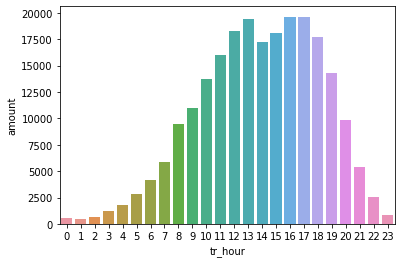

In [ ]:
df_1010 = pd.DataFrame(a[1010], columns = ['amount'])
sns.barplot(data = df_1010, x = df_1010.index, y = df_1010['amount'] )

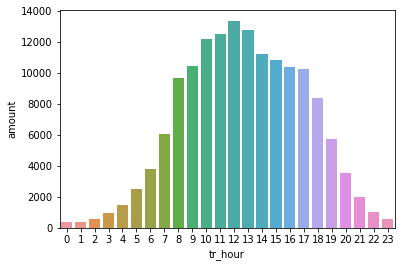

In [ ]:
df_2010 = pd.DataFrame(a[2010], columns = ['amount'])
sns.barplot(data = df_2010, x = df_2010.index, y = df_2010['amount'] )

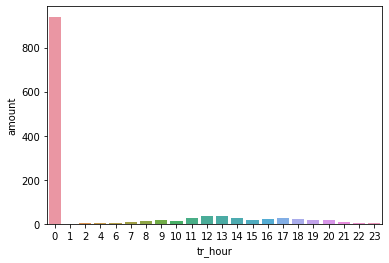

In [ ]:
df_2110 = pd.DataFrame(a[2110], columns = ['amount'])
sns.barplot(data = df_2110, x = df_2110.index, y = df_2110['amount'] )

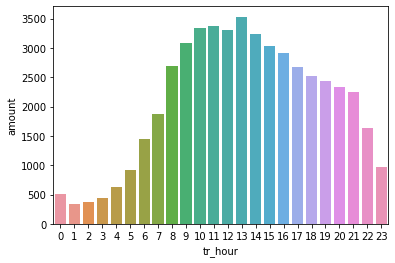

In [ ]:
df_2370 = pd.DataFrame(a[2370], columns = ['amount'])
sns.barplot(data = df_2370, x = df_2370.index, y = df_2370['amount'] )

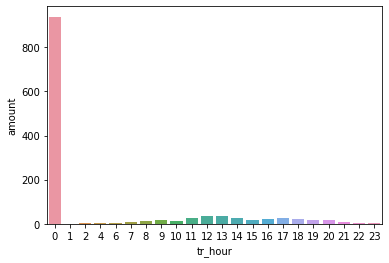

In [ ]:
df_4110 = pd.DataFrame(a[4110], columns = ['amount'])
sns.barplot(data = df_4110, x = df_4110.index, y = df_4110['amount'] )